# Substance Use and Academic Performance

## Overview

[Overview Paragraph]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import nbinom, poisson
import random

## Alcohol

In [3]:
# Study Measures
alc_quantity = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10+']
gpa_vals = ['4', '3', '2', '1']

a_probabilities = []
b_probabilities = []
c_probabilities = []
f_probabilities = []

# Estimated probabilities for number of drinks using Poisson distribution and given means
for x in range(len(alc_quantity)-1):
    prob = poisson.pmf(x, mu=2.22)
    a_probabilities.append(prob)
    prob = poisson.pmf(x, mu=3.37)
    b_probabilities.append(prob)
    prob = poisson.pmf(x, mu=3.60)
    c_probabilities.append(prob)
    prob = poisson.pmf(x, mu=3.91)
    f_probabilities.append(prob)

# Probability for 10 or moredrinks
a_probabilities.append(1 - poisson.cdf(9, mu=2.8))
b_probabilities.append(1 - poisson.cdf(9, mu=3.6))
c_probabilities.append(1 - poisson.cdf(9, mu=3.876))
f_probabilities.append(1 - poisson.cdf(9, mu=3.748))

# Simulated Sample Data
n = 23518
data = {'GPA': [], 'Number of Drinks': []}
for student in range(n):
    gpa = random.choices(gpa_vals, weights=[0.27, 0.38, 0.21, 0.14])[0]
    if gpa == '4':
        drinks = random.choices(alc_quantity, weights=a_probabilities)[0]
    elif gpa == '3':
        drinks = random.choices(alc_quantity, weights=b_probabilities)[0]
    elif gpa == '2':
        drinks = random.choices(alc_quantity, weights=c_probabilities)[0]
    else:
        drinks = random.choices(alc_quantity, weights=f_probabilities)[0]
    data['GPA'].append(gpa)
    data['Number of Drinks'].append(drinks)

Text(0.5, 1.0, 'Distribution of the Number of Drinks Consumed by GPA')

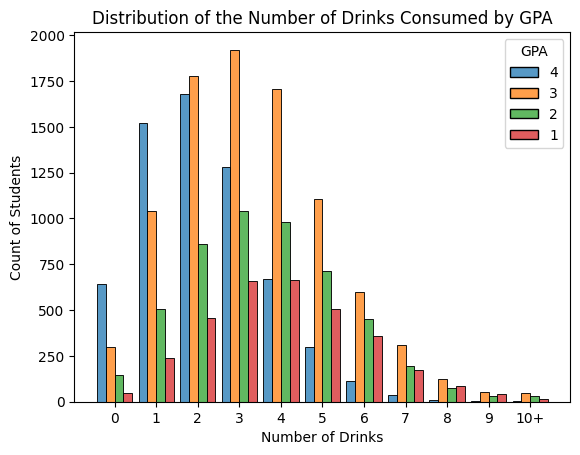

In [4]:
# convert data dict to DataFrame and ensure categorical ordering for the x-axis
df = pd.DataFrame(data)
df['Number of Drinks'] = pd.Categorical(df['Number of Drinks'], categories=alc_quantity, ordered=True)

sns.histplot(data=df, x='Number of Drinks', hue='GPA', multiple='dodge', shrink=0.85, hue_order=gpa_vals)
plt.ylabel('Count of Students')
plt.title("Distribution of the Number of Drinks Consumed by GPA")

(0.0, 2000.0)

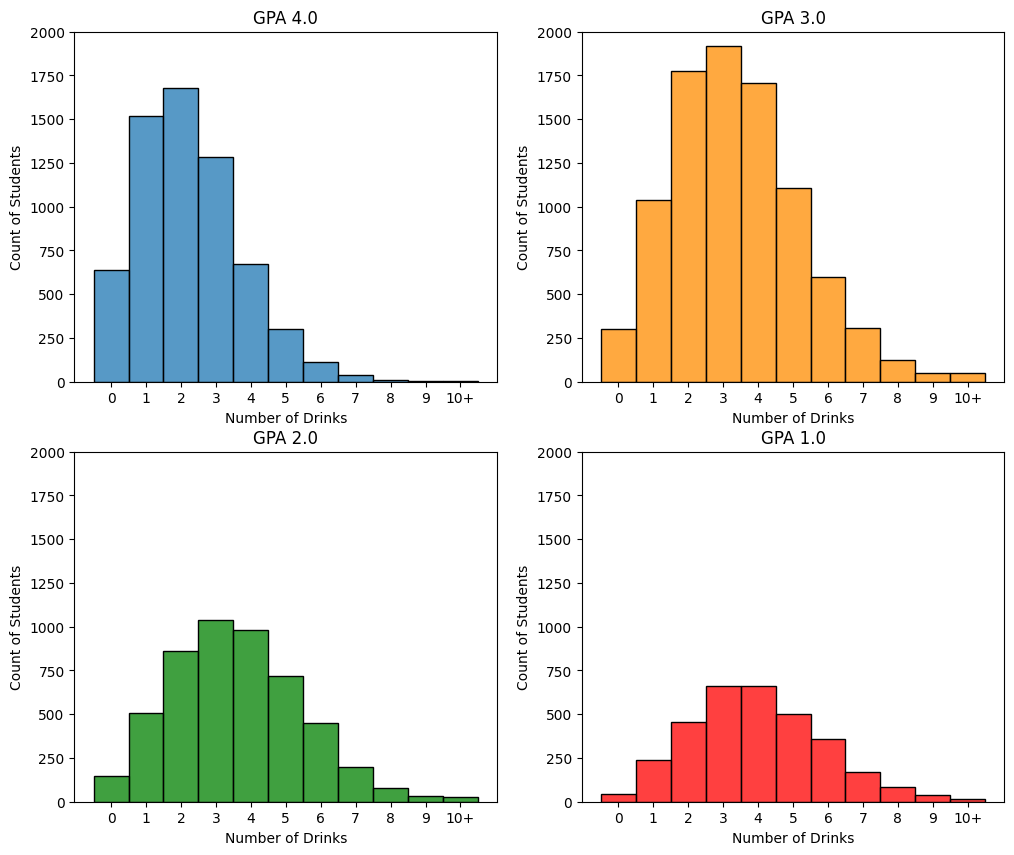

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(data=df[df['GPA'] == '4'], x='Number of Drinks',ax=axs[0,0])
axs[0,0].set_title('GPA 4.0')
axs[0,0].set_ylabel('Count of Students')
axs[0,0].set_ylim(0, 2000)

sns.histplot(data=df[df['GPA'] == '3'], x='Number of Drinks',ax=axs[0,1], color = 'darkorange')
axs[0,1].set_title('GPA 3.0')
axs[0,1].set_ylabel('Count of Students')
axs[0,1].set_ylim(0, 2000)

sns.histplot(data=df[df['GPA'] == '2'], x='Number of Drinks', ax=axs[1,0], color = 'green')
axs[1,0].set_title('GPA 2.0')
axs[1,0].set_ylabel('Count of Students')
axs[1,0].set_ylim(0, 2000)

sns.histplot(data=df[df['GPA'] == '1'], x='Number of Drinks', ax=axs[1,1], color = 'red')
axs[1,1].set_title('GPA 1.0')
axs[1,1].set_ylabel('Count of Students')
axs[1,1].set_ylim(0, 2000)

### Simulate the Experiment ___ Times

## Marijuana

## Vaping